In [0]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
from google.colab import files
uploaded = files.upload()

Saving citibike-tripdata.csv to citibike-tripdata (2).csv


In [116]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "citibike-tripdata.csv" with length 7879505 bytes


In [0]:
import io
df = pd.read_csv(io.StringIO(uploaded['citibike-tripdata.csv'].decode('utf-8')))
df = df.sample(50)

In [0]:
x1 = len(df['start station id'].unique())
y1 = len(df[['start station id', 'start station name']].drop_duplicates())
x2 = len(df['end station id'].unique())
y2 = len(df[['end station id', 'end station name']].drop_duplicates())


In [0]:
x1 = len(df['start station id'].unique())
y1 = len(df[['start station id', 'start station latitude']].drop_duplicates())
x2 = len(df['end station id'].unique())
y2 = len(df[['end station id', 'end station latitude']].drop_duplicates())


In [0]:
x1 = len(df['start station id'].unique())
y1 = len(df[['start station id', 'start station longitude']].drop_duplicates())
x2 = len(df['end station id'].unique())
y2 = len(df[['end station id', 'end station longitude']].drop_duplicates())


In [0]:
t1 = df[['start station id', 'start station name', 'start station latitude', 'start station longitude']] \
            .drop_duplicates().rename(columns = {'start station id':'station id', \
                                                 'start station name':'station name', \
                                                 'start station latitude':'station latitude', 
                                                 'start station longitude': 'station longitude'})
t2 = df[['end station id', 'end station name', 'end station latitude', 'end station longitude']] \
        .drop_duplicates().rename(columns = {'end station id':'station id', \
                                             'end station name':'station name', \
                                             'end station latitude':'station latitude', \
                                             'end station longitude': 'station longitude'})
df_loc = pd.concat([t1, t2]).drop_duplicates()

{3186: (-74.0431174635887, 40.71958611647166), 3213: (-74.047726625, 40.71848892), 3212: (-74.050443636, 40.734785818), 3681: (-74.03768330812454, 40.71517767732029), 3195: (-74.06391263008119, 40.73089709786179), 3481: (-74.04105, 40.71649), 3192: (-74.0557013, 40.711242299999995), 3639: (-74.034234, 40.71925170000001), 3792: (-74.03281, 40.71687), 3193: (-74.07840594649316, 40.7246050998869), 3209: (-74.05065640000001, 40.7241765), 3202: (-74.03375890000001, 40.7272235), 3640: (-74.0625, 40.733670000000004), 3207: (-74.05247829999999, 40.7376037), 3638: (-74.0354826, 40.7242941), 3267: (-74.03852552175522, 40.7124188237569), 3184: (-74.0335519, 40.7141454), 3791: (-74.04696375131606, 40.73520838045357), 3194: (-74.06762212514876, 40.7253399253558), 3272: (-74.04595255851744, 40.723331586464354), 3210: (-74.051788633, 40.742677141), 3275: (-74.03891444206238, 40.71835519823214), 3203: (-74.044247311, 40.727595965999996), 3268: (-74.06285852193831, 40.71346382669195), 3276: (-74.042817

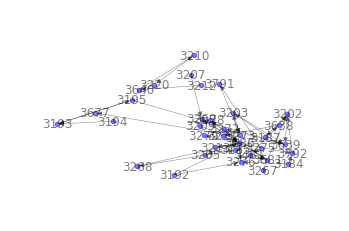

In [176]:
# Create a directed graph
NG = nx.DiGraph()

#Add each unique station id as a node in the network
for i, j, k in zip(df_loc['station id'], df_loc['station longitude'], df_loc['station latitude']):
    NG.add_node(i,pos=(j,k)) 

pos= nx.get_node_attributes(NG, 'pos') 
print(pos) 

#Add each start and stop station id pair as an edge in the network
for i, j in zip(df['start station id'], df['end station id']):
    NG.add_edge(i,j) 

print('# of edges: {}'.format(NG.number_of_edges())) 
print('# of nodes: {}'.format(NG.number_of_nodes())) 
plt.axis('off')
nx.draw(NG,pos,node_size=20,with_labels = 'true', node_color='blue',alpha=0.5,width=0.5)

In [177]:
#degree distribution
print(NG.degree(df_loc['station id'])) 
print(nx.in_degree_centrality(NG))
print(nx.out_degree_centrality(NG)) 

[(3186, 15), (3213, 2), (3212, 1), (3681, 4), (3195, 3), (3481, 2), (3192, 4), (3639, 5), (3792, 4), (3193, 3), (3209, 1), (3202, 5), (3640, 2), (3207, 1), (3638, 3), (3267, 1), (3184, 2), (3791, 2), (3194, 1), (3272, 2), (3210, 2), (3275, 2), (3203, 4), (3268, 2), (3276, 5), (3269, 3), (3205, 3), (3278, 2), (3677, 1), (3187, 1), (3211, 1), (3273, 2), (3220, 1), (3185, 1), (3279, 1)]
{3186: 0.1764705882352941, 3213: 0.029411764705882353, 3212: 0.0, 3681: 0.058823529411764705, 3195: 0.029411764705882353, 3481: 0.0, 3192: 0.029411764705882353, 3639: 0.08823529411764705, 3792: 0.058823529411764705, 3193: 0.058823529411764705, 3209: 0.0, 3202: 0.08823529411764705, 3640: 0.029411764705882353, 3207: 0.0, 3638: 0.029411764705882353, 3267: 0.0, 3184: 0.0, 3791: 0.029411764705882353, 3194: 0.0, 3272: 0.029411764705882353, 3210: 0.029411764705882353, 3275: 0.029411764705882353, 3203: 0.058823529411764705, 3268: 0.029411764705882353, 3276: 0.08823529411764705, 3269: 0.058823529411764705, 3205: 0.

In [178]:
#centrality measures
print(nx.closeness_centrality(NG))
print(nx.betweenness_centrality(NG))
print(nx.edge_betweenness_centrality(NG))

{3186: 0.22590738423028786, 3213: 0.16334841628959276, 3212: 0.0, 3681: 0.17405978784956608, 3195: 0.0392156862745098, 3481: 0.0, 3192: 0.0, 3639: 0.22120098039215685, 3792: 0.1769607843137255, 3193: 0.058823529411764705, 3209: 0.0, 3202: 0.17125237191650855, 3640: 0.029411764705882353, 3207: 0.0, 3638: 0.029411764705882353, 3267: 0.0, 3184: 0.0, 3791: 0.12592804111936037, 3194: 0.0, 3272: 0.16590073529411764, 3210: 0.0392156862745098, 3275: 0.14347202295552366, 3203: 0.1830628803245436, 3268: 0.17559262510974538, 3276: 0.17125237191650855, 3269: 0.1415686274509804, 3205: 0.17559262510974538, 3278: 0.18674136321195145, 3677: 0.17301038062283738, 3187: 0.14347202295552366, 3211: 0.0392156862745098, 3273: 0.1757443718228032, 3220: 0.04411764705882353, 3185: 0.14739304812834225, 3279: 0.17559262510974538}
{3186: 0.2571301247771836, 3213: 0.0, 3212: 0.0, 3681: 0.026737967914438502, 3195: 0.035650623885918, 3481: 0.0, 3192: 0.0, 3639: 0.142602495543672, 3792: 0.031194295900178252, 3193: 0.0

In [179]:
#connectivity
print(nx.is_strongly_connected(NG))
print(nx.number_strongly_connected_components(NG))
print(nx.is_weakly_connected(NG))
print(nx.number_weakly_connected_components(NG))

False
25
False
2


In [180]:
#pagerank
print(nx.pagerank(NG))

{3186: 0.10068367580544604, 3213: 0.019203008271244812, 3212: 0.009693788346248674, 3681: 0.02332292209625155, 3195: 0.03904223471909593, 3481: 0.009693788346248674, 3192: 0.013526292199579232, 3639: 0.05299134865917808, 3792: 0.02332292209625155, 3193: 0.03452691177220239, 3209: 0.009693788346248674, 3202: 0.033716949269175164, 3640: 0.017933615996262153, 3207: 0.009693788346248674, 3638: 0.013813702171255413, 3267: 0.009693788346248674, 3184: 0.009693788346248674, 3791: 0.027743915309587443, 3194: 0.009693788346248674, 3272: 0.032215598121665794, 3210: 0.024937579503083143, 3275: 0.021235058872438796, 3203: 0.029115436842445833, 3268: 0.019203008271244812, 3276: 0.027155425949582108, 3269: 0.027846044567463177, 3205: 0.12792675890170158, 3278: 0.029115436842445833, 3677: 0.032215598121665794, 3187: 0.02402373758785782, 3211: 0.01556469304796066, 3273: 0.0456508735867865, 3220: 0.030891060987902553, 3185: 0.026016663735240225, 3279: 0.019203008271244812}


In [181]:
#HITS
print(nx.hits(NG))

({3186: 0.45435325989592434, 3213: 0.018126165611662012, 3212: 9.587405502531062e-45, 3681: 0.05601853953230023, 3195: 8.19821608771562e-18, 3481: 0.05527926538085255, 3192: 0.09263858570176284, 3639: 8.433171064189205e-32, 3792: 0.057084751078965046, 3193: 9.587405502531062e-45, 3209: 0.018126165611662012, 3202: 7.404726541624704e-18, 3640: 9.587405502531062e-45, 3207: 0.006076267816678583, 3638: 0.00780156528136101, 3267: 0.007038145568536358, 3184: 0.12182948107939208, 3791: 2.5505291141637073e-18, 3194: 2.5505291141637073e-18, 3272: 0.018126165611662012, 3210: 9.587405502531062e-45, 3275: 9.587405502531062e-45, 3203: 8.19821608771562e-18, 3268: 9.587405502531062e-45, 3276: 0.02009229041997479, 3269: 0.018126165611662012, 3205: 0.04928318579760403, 3278: 0.0, 3677: 0.0, 3187: 0.0, 3211: 0.0, 3273: 0.0, 3220: 0.0, 3185: 0.0, 3279: 0.0}, {3186: 0.03605060370960151, 3213: 0.08842638490581904, 3212: 0.0, 3681: 0.09918485420140555, 3195: 1.9068112019931435e-44, 3481: 0.0, 3192: 0.0180293

In [183]:
#avergae shortest path length
print(nx.shortest_path(NG))


{3186: {3186: [3186], 3268: [3186, 3268], 3278: [3186, 3278], 3792: [3186, 3792], 3203: [3186, 3203], 3213: [3186, 3213], 3205: [3186, 3205], 3276: [3186, 3276], 3279: [3186, 3279], 3681: [3186, 3681], 3185: [3186, 3268, 3185], 3202: [3186, 3792, 3202], 3639: [3186, 3203, 3639], 3273: [3186, 3203, 3273], 3275: [3186, 3276, 3275], 3269: [3186, 3681, 3269], 3187: [3186, 3792, 3202, 3187], 3677: [3186, 3203, 3639, 3677], 3272: [3186, 3203, 3639, 3272], 3791: [3186, 3276, 3275, 3791]}, 3213: {3213: [3213], 3186: [3213, 3186], 3268: [3213, 3186, 3268], 3278: [3213, 3186, 3278], 3792: [3213, 3186, 3792], 3203: [3213, 3186, 3203], 3205: [3213, 3186, 3205], 3276: [3213, 3186, 3276], 3279: [3213, 3186, 3279], 3681: [3213, 3186, 3681], 3185: [3213, 3186, 3268, 3185], 3202: [3213, 3186, 3792, 3202], 3639: [3213, 3186, 3203, 3639], 3273: [3213, 3186, 3203, 3273], 3275: [3213, 3186, 3276, 3275], 3269: [3213, 3186, 3681, 3269], 3187: [3213, 3186, 3792, 3202, 3187], 3677: [3213, 3186, 3203, 3639, 367

In [184]:
#average clustering coefficient
print(nx.average_clustering(NG))

0.06101094159346587
